#### Západočeská univerzita v Plzni
# Agent-based-modeling a 
# Axelrodův model šíření kultury

 
<br>
<br>
<br>

## Semestrální práce KMA/MM

__Anežka Švandová, Jan Půlpán__



## Co je Agent-based-modeling (ABM)

- metoda simulace chování "společenství" agentů
- agentem rozumíme samostatnou entitu, jejíž chování určují sousední agenti případně i okolní prostředí

## Propojení agentů

- agenti jsou propojeni do sítě
- různé typy sítí: mřížka, malý svět, náhodný graf apod. 

|Mřížka | Malý svět|
|:---:|:---:|
|![alt](mrizka.png) | ![alt](small_world.png)|

- v rámci sítě mohou agenti i cestovat

## Co je Agent-based-modeling (ABM)


- ABM zkoumá kromě ekvilibria (klidových stavů) i vývoj celého systému
- modelování odspoda nahoru - z chování jednotlivých agentů odvozujeme chování systému

## Obecná implementace

- lze popsat pomocí Markovova procesu, případně řetězce - jen pro malé sítě
- nejčastěji se zkoumá pomocí simulací
- existují nástroje: NetLogo, Repast, MASON, Mesa




## Obecná implementace

- simulace probíhá v diskrétním čase po jednotlivých iteracích
- síť je reprezentována neorientovaným grafem 
- vrcholy = agenti, hrany = jejich propojení
- výpočetní čas může být extrémní, záleží na implementaci a také typu sítě
- my jsme zvolili obecnou a proto pomalou implementaci

## Axelrodův model šíření kultur [1]

> “If people tend to become more alike in their beliefs, attitudes, and behavior when they interact, why do not all such a differences eventually dissapear?”


- agenti jsou popsáni seznamem features a jejich možných traits
- dimenzi kultury (počet features) značímě $F$
- počet traits $q$
- agenti jsou uspořádáni do mřížky
- každý kromě krajních má 4 sousedy

<br>
<br>

<sup> [1] Axelrod R, (1997) The dissemination of culture - A model with local	convergence and global polarization. Journal of Conflict Resolution 41(2), pp. 203-226.</sup>

Features (česky vlastnosti) - např. jazyk, náboženství, styl oblékání



## Axelrodův model šíření kultur

- síť inicializujeme náhodnými hodnotami z uniformního diskrétního rozdělení
$$ X(x) = [X^1(x), X^2(x), \dots , X^F(x)] \text{, kde } X^i(x) \in \{1,2,\dots,q\}$$ 
$$\text{ pro } i=1,2,\dots,F.$$
- sousední agenti interagují s pravděpodobností dannou funkcí similarity

$$ f(x,y) = \frac{1}{F} \sum_{i=1}^F \delta_{X^i(x), \, X^i(y)}, \; \text{ kde } \; \delta_{k, l} = \begin{cases} 0 \text{ pro } k \neq l \\ 1 \text{ pro } k = l \end{cases}$$





- f(x,y) = 0 znamená že nemají nic společného
- f(x,y) = 1 znamená že nemají všechno společné a nemají co synchronizovat

## Axelrodův model šíření kultur

Opakuj pokud je možná interakce, nebo není dosaženo maximálního počtu iterací:

1. Vyber náhodně aktivního agenta $x$ a jeho náhodného souseda $y$
2. Agenti interagují s pravděpodobností $f(x,y)$. Pokud interagují, předá soused $y$ aktivnímu agentovi $x$ jednu náhodně vybranou vlastnost $X^i$, ve které se neshodují.

Agenti neinteragují pokud $f(x,y)=0$ nebo $f(x,y)=1$

<center><img src='axelrod_model.gif'></center>



## Axelrodův model šíření kultur

- simulace vytváří __kulturní regiony__ 
    - skupiny sousedních agentů s $f(x,y)=1$


__Dospěje model k jednotné kultuře? Na čem je to závislé?__


## Simulace

- jednoduchá knihovna v Pythonu
- implementuje mřížku a malý svět (včetně náhodných propojení)
- síť popisujeme maticí sousednosti $M_{adj}$, stav modelu pomocí matice global similarity $M_{gs}$
- je poměrně pomalá

- $M_{adj}$ ... 1, pokud jsou agenti sousedé
- $M_{gs}$ ... obsahuje hodnoty funkce similarity pro všechny sousední agenty

## Simulace

In [1]:
from culture import Culture, Simulation

c1 = Culture(16, 0, 5, 5, 50000, random_con=False)
c1.simulate(save_progress=200)
c1.analyze()

Počet agentů: 16 (f:5, t:5)
Počet všech propojení: 64
Počet propojení která mohou interagovat (0 < similarity < 1): 0
Počet komponent/kultur: 1

Maximální počet iterací: 50000
Model konvergoval v 618 iteracích




## Simulace

|200 iterací | 400 iterací|
|:---:|:---:|
|![alt](sim_200.png) | ![alt](sim_400.png)|

---

|600 iterací | ekvilibrium |
|:---:|:---:|
|![alt](sim_600.png) | ![alt](sim_final.png)|

## Počet stabilních regionů

Na čem je závislý počet stabilních regionů?

- dělali jsme sadu simulací s parametry:
    - počet features $F$
    - počet traits $q$
    - velikost sítě (počet agentů)
    - tvar sítě (mřížka vs. malý svět)

## Počet features $F$ a traits $q$

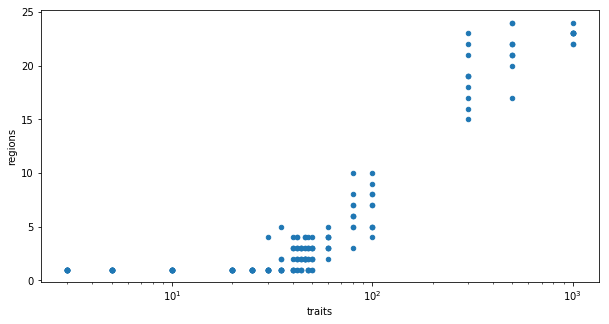

In [9]:
sQ1=Simulation(a_cnt=[25,],t_cnt=[3,5,10,20,25,30,35,40,42,44,46,48,50,60,80,100,300,500,1000],
               c_net=1,f_cnt=[5,20,50],sim_cnt=10,maxiter=100000,file='simul_q25_mrizka.csv')
sQ1.traits_regs_plot(a_cnt=25, f_cnt=20)

__Od určitého kritického bodu $q_c$ počet regionů roste, až každý agent vytvoří svůj vlastní region.__

## Velikost sítě


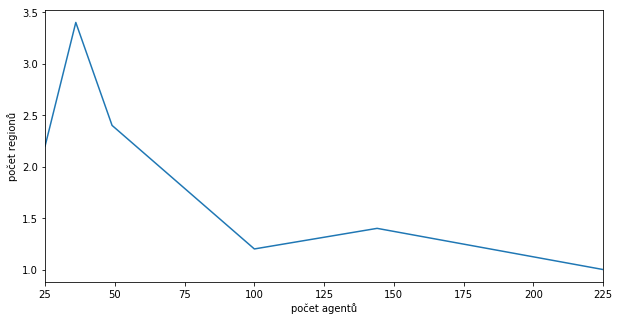

In [27]:
s1 = Simulation(a_cnt=[25, 36, 49, 100, 144, 225], c_net=1,
               f_cnt=[2, 6, 10], t_cnt=[2, 6, 10, 14, 18],
               sim_cnt=5, maxiter=500000, file='simulations_lattice.csv')

s1.agents_regs_plot(6,14)

__Počet stabilních regionů klesá s rostoucí velikostí sítě.__

## Výsledky

- stupeň polarizace = počet rozdílných kulturních regionů
- polarizace se zvětšuje pro kultury menší dimenze s velkým rozsahem traits
     - _Toto ukazuje, že složitější rozdíly, které by se měly vyřešit sociální interakcí jsou ty, kde problémů je málo, ale je hodně možností jak je vyřešit._
- polarizace se snižuje pro větší sítě

## Výsledky

- výsledky se výrazně neliší pro mřížku nebo malý svět
    - v obou se projevuje vliv kritického bodu $q_c$ na polarizaci
    - u malého světa pokud roste podíl náhodných vzdálených propojení, roste i $q_c$
    - malý svět tíhne více ke globalizaci

# Otázky ... ?

# Děkujeme za pozornost.

## Algebraizace modelu

- Hinkelmann, Murrugarra a Jarrah [2] navrhli rozšíření ODD protokolu popisující ABM model pomocí polynomů 
- nechť $\mathbb{F}$ je stavový prostor tvořící těleso
- stav celého systému je vektor hodnot (jedna pro každého agenta $x_i$) z $\mathbb{F}$
- pro každého agenta $x_i$ definujeme lokální přechodovou funkci $f_i : \mathbb{F}^n \longrightarrow \mathbb{F}$, vstupem jsou stavy sousedních agentů
- celý systém popíšeme funkci $f = (f_1,\dots,f_n): \mathbb{F}^n \longrightarrow \mathbb{F}^n$, kde všechny $f_i \in \mathbb{F}[x_1, \dots , x_n]$ jsou polynomy


<sup>[2] Hinkelmann, F., Murrugarra, D., Jarrah, A.S. et al. A Mathematical Framework for Agent Based Models of Complex Biological Networks, Bull Math Biol (2011) 73: 1583. https://doi.org/10.1007/s11538-010-9582-8</sup>

## Příklad: Conway's Game of Life

- čtvercová síť agentů, $\mathbb{F}_2 = \{$mrtvý,živý$\}$ 
- každý agent má 8 sousedů (vlevo/vpravo, nahoře/dole, diagonálně)
- platí pravidla:
  - každý živý agent s méně než 2 živými sousedy umírá
  - každý živý agent s více než 3 živými sousedy umírá
  - každý živý agent s 2 nebo 3 živými sousedy zůstává naživu
  - každý mrtvý agent s přesně 3 živými sousedy obživne




## Příklad: Conway's Game of Life

- definujeme funkci
$$f_x(x,x_1,\dots,x_8)= \begin{cases} 0 : \sum_{i=1}^8 x_i < 2 \\ 0 : \sum_{i=1}^8 x_i = 2 \text{ a } x = 0 \\ 1 : \sum_{i=1}^8 x_i = 2 \text{ a } x = 1 \\ 1 : \sum_{i=1}^8 x_i = 3 \\ 0 : \sum_{i=1}^8 x_i > 3\end{cases}$$

- algebraický model má tvar
$$f = (f_1, \dots, f_{n \times n}):\mathbb{F}_2^{n \times n} \longrightarrow \mathbb{F}_2^{n \times n}, x_i \mapsto f_i(x_1, \dots, x_{n \times n})$$

- stabilní stavy modelu získáme vyřešením soustavu polynomiálních rovnic
$$f_i(x) - x_i = 0, \; i=1\dots n \times n$$


- kde $n$ je dimenze čtvercové mřížky

## Příklad: Conway's Game of Life

- na mřížce $4 \times 4$ existuje celkem $2^{16} = 65536$ stavů
- model je popsán 16 rovnicemi
- vhodné spíše pro menší sítě, počet stavů a rovnic rychle roste 


Takovýto systém lze vyřešit poměrně snadno. Pro větší mřížky stavový prostor rychle narůstá a stejně tak i počet rovnic.

# Děkujeme za pozornost.